In [2]:
# Configuration for the both networks

 #epochs for the network 1 - Image Noise Classification Model
network_1_epochs=30 #Ideal value is 30

#epochs for the network 2 - All for DAEs Models
network_2_epochs=40 #Ideal value is 40

# Network # 1:Image Noise Classfication

In [47]:
import os
import warnings
import random

from shutil import copyfile
warnings.filterwarnings('ignore')

In [48]:
# Get all the paths
data_dir_list = os.listdir('dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("dataset"))
file_count = len(files)
original_dataset_dir = 'dataset'
# print(file_count)

['gau_noise_imgs', 'po_noise_imgs', 'spk_noise_imgs', 'sp_noise_imgs']


gau =  Gaussian Noise | po = Poission Noise | spk = Speckle Noise | sp = Salt and Pepper Noise

Processing Dataset if dataset folder not exsist-this code is making direcotries and splitting the dataset into different folders 

In [49]:
#check if noise dataset is already processed - if exsist skip the dataset folder creation
isdir = os.path.isdir('imgsnoise-data')

if isdir:
    print('Dataset already processed - dataset directories already exsist and splitted into training and testing')
else:
    print('Creating Directories and splitting the training and validation - processing the dataset for model')
    # Creating new base directory
    base_dir = 'imgsnoise-data/'
    os.mkdir(base_dir)

    #creating two folders (train and validation)
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)

    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)

    #Under train folder create four folder
    # (gau_noise_imgs, po_noise_imgs, spk_noise_imgs, sp_noise_imgs)

    train_gau_dir = os.path.join(train_dir, 'gau_noise_imgs')
    os.mkdir(train_gau_dir)

    train_po_dir = os.path.join(train_dir, 'po_noise_imgs')
    os.mkdir(train_po_dir)

    train_sp_dir = os.path.join(train_dir, 'sp_noise_imgs')
    os.mkdir(train_sp_dir)

    train_spk_dir = os.path.join(train_dir, 'spk_noise_imgs')
    os.mkdir(train_spk_dir)


    #Under validation folder create four folders
    # (gau_noise_imgs, po_noise_imgs, spk_noise_imgs, sp_noise_imgs)

    validation_gau_dir = os.path.join(validation_dir, 'gau_noise_imgs')
    os.mkdir(validation_gau_dir)

    validation_po_dir = os.path.join(validation_dir, 'po_noise_imgs')
    os.mkdir(validation_po_dir)

    validation_sp_dir = os.path.join(validation_dir, 'sp_noise_imgs')
    os.mkdir(validation_sp_dir)

    validation_spk_dir = os.path.join(validation_dir, 'spk_noise_imgs')
    os.mkdir(validation_spk_dir)

    def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
        files = []
        for filename in os.listdir(SOURCE):
            file = SOURCE + filename
            if os.path.getsize(file) > 0:
                files.append(filename)
            else:
                print(filename + " is zero length, so ignoring.")

        training_length = int(len(files) * SPLIT_SIZE)
        valid_length = int(len(files) - training_length)
        shuffled_set = random.sample(files, len(files))
        training_set = shuffled_set[0:training_length]
        valid_set = shuffled_set[training_length:]

        for filename in training_set:
            this_file = SOURCE + filename
            destination = TRAINING + filename
            copyfile(this_file, destination)

        for filename in valid_set:
            this_file = SOURCE + filename
            destination = VALIDATION + filename
            copyfile(this_file, destination)

    GAU_SOURCE_DIR = 'dataset/gau_noise_imgs/'
    TRAINING_GAU_DIR = 'imgsnoise-data/train/gau_noise_imgs/'
    VALID_GAU_DIR = 'imgsnoise-data/validation/gau_noise_imgs/'

    PO_SOURCE_DIR = 'dataset/po_noise_imgs/'
    TRAINING_PO_DIR = 'imgsnoise-data/train/po_noise_imgs/'
    VALID_PO_DIR = 'imgsnoise-data/validation/po_noise_imgs/'

    SP_SOURCE_DIR = 'dataset/sp_noise_imgs/'
    TRAINING_SP_DIR = 'imgsnoise-data/train/sp_noise_imgs/'
    VALID_SP_DIR = 'imgsnoise-data/validation/sp_noise_imgs/'

    SPK_SOURCE_DIR = 'dataset/spk_noise_imgs/'
    TRAINING_SPK_DIR = 'imgsnoise-data/train/spk_noise_imgs/'
    VALID_SPK_DIR = 'imgsnoise-data/validation/spk_noise_imgs/'



    split_size = .80 # split the data into given ratio

    split_data(GAU_SOURCE_DIR, TRAINING_GAU_DIR, VALID_GAU_DIR, split_size)
    split_data(PO_SOURCE_DIR, TRAINING_PO_DIR, VALID_PO_DIR, split_size)
    split_data(SP_SOURCE_DIR, TRAINING_SP_DIR, VALID_SP_DIR, split_size)
    split_data(SPK_SOURCE_DIR, TRAINING_SPK_DIR, VALID_SPK_DIR, split_size)

Dataset already processed - dataset directories already exsist and splitted into training and testing


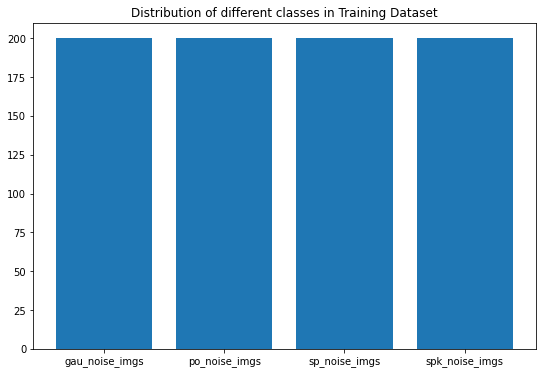

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['gau_noise_imgs', 'po_noise_imgs', 'sp_noise_imgs', 'spk_noise_imgs']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('imgsnoise-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [51]:
for i in ['gau_noise_imgs', 'po_noise_imgs', 'sp_noise_imgs', 'spk_noise_imgs']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('imgsnoise-data/train/'+i+'/'))))

Training gau_noise_imgs images are: 200
Training po_noise_imgs images are: 200
Training sp_noise_imgs images are: 200
Training spk_noise_imgs images are: 200


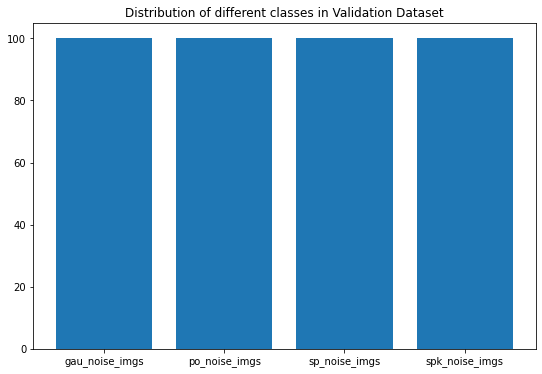

In [52]:
image_folder = ['gau_noise_imgs', 'po_noise_imgs', 'sp_noise_imgs', 'spk_noise_imgs']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('imgsnoise-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [53]:
for i in ['gau_noise_imgs', 'po_noise_imgs', 'sp_noise_imgs', 'spk_noise_imgs']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('imgsnoise-data/validation/'+i+'/'))))

Valid gau_noise_imgs images are: 100
Valid po_noise_imgs images are: 100
Valid sp_noise_imgs images are: 100
Valid spk_noise_imgs images are: 100


In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [55]:
img_width=32; img_height=32
batch_size=16

In [56]:
TRAINING_DIR = 'imgsnoise-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
#After deleting rotation_range and zoom_range we got good accuracy as an experiment. 

Found 800 images belonging to 4 classes.


In [57]:
VALIDATION_DIR = 'imgsnoise-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 400 images belonging to 4 classes.


In [58]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = 'Image_noie_classification_model-Newtwork1.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
model.summary()

In [60]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['acc'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=network_1_epochs,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.title('Training and Validation loss')

In [ ]:
import visualkeras

model = 'Image_noie_classification_model-Newtwork1.h5'

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

# Testing Network # 1  - Image Noise Classfication

In [ ]:
# Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [66]:
#Croping all images available in data_test directory to 32x32 to test properly becaue our network is trainned on 32x32

from PIL import Image
import os
from os import listdir

# get the path/directory
folder_dir = "data_test/"
for images in os.listdir(folder_dir):

    # check if the image ends with png
    if (images.endswith(".png")):
        #print(images)
        # Opens a image in RGB mode
        im = Image.open(r"data_test/"+images)
        # Size of the image in pixels (size of original image)
        # (This is not mandatory)
        width, height = im.size
        #Setting the points for cropped image
        left = 0
        top = 0

        right = 32
        bottom = 32

        # Cropped image of above dimension
        # (It will not change original image)
        im1 = im.crop((left, top, right, bottom))

        # Shows the image in image viewer
        # im1.show()
        im1.save('data_test/'+images)

In [ ]:
# Read Test Images from dir and their label correct lables from csv.
test_images_dir = 'data_test/'
test_df = pd.read_csv('test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('Image_noie_classification_model-Testing.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

In [ ]:
test_df = pd.read_csv('test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

In [ ]:
train_dir = 'imgsnoise-data/train/'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(10,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

#Function for True noise printing
def true_noise(img_path):
     #Prinitng True Noise
    if "gau_noise" in img_path:
        print("True Noise: Gaussian")
    elif "po_noise" in img_path:
        print("True Noise: Poisson")
    elif "sp_noise" in img_path:
        print("True Noise: Salt & Pepper")
    elif "spk_noise" in img_path:
        print("True Noise: Speckle")
    else:
        print("Image is not properly named with true label! - image name must contain 'gau_noise' 'po_noise' 'sp_noise' 'spk_noise'")


# load an image and predict the class
def predict_image_noise(img_path):
    
    # load the image
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    img = load_image(img_path)
    
    # load model
    model = tf.keras.models.load_model('Image_noie_classification_model-Newtwork1.h5')
    # predict the class
    predict_x=model.predict(img)
    
   #Prinitng True Noise from function "true_noise"
    true_noise(img_path)
    
    result=np.argmax(predict_x,axis=1)
    if result[0]==0:
        print("Predicted Noise: Gaussian")
        plt.title("Gaussian Noise")
    elif result[0]==1:
        print("Predicted Noise: Poission")
        plt.title("Poission Noise")
    elif result[0]==2:
        print("Predicted Noise: Salt & Pepper")
        plt.title("Salt & Pepper Noise")
    elif result[0]==3:
        print("Predicted Noise: Speckle")
        plt.title("Speckle Noise")
    plt.show()
    

In [ ]:
# Importing Image class from PIL module for image cropping purpose 
from PIL import Image

# A function which will crop an image from 4 corners and in middle of the image to exract 5 small images to predict
def img_random_crop(img_name):
    #set extension of image here in last
    im = Image.open(r"manual_test_images/"+img_name+".png")

    # Size of the image in pixels (size of original image)
    width, height = im.size

    #Crop size
    c_width=32
    c_height=32

    #Cropped top-left
    left = 0
    top = 0
    right = c_width
    bottom = c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_top_left.png')

    #Cropped top-right
    left = width-c_width
    top = 0
    right = left+c_width
    bottom = top+c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_top_right.png')

    #Cropped bottom-left
    left = 0
    top = height-c_height
    right = left+c_width
    bottom = top+c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_bottom_left.png')

    #Cropped bottom-right
    left = width-c_width
    top = height-c_height
    right = left+c_width
    bottom = top+c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_bottom_right.png')

    # Cropped center
    left = width/2
    top = height/2
    right = left+c_width
    bottom = top+c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_center.png')

In [ ]:
#entry point, run the example to check how model is working on large resolution images vs cropped images of same image.
img_name="gau_noise8" # insert image name here 
img_random_crop(img_name) # this function will crop 5 small images from the large size resolution image
predict_image_noise("manual_test_images/"+img_name+".png")
predict_image_noise('manual_test_images/'+img_name+'cropped_top_left.png')
predict_image_noise('manual_test_images/'+img_name+'cropped_top_right.png')
predict_image_noise('manual_test_images/'+img_name+'cropped_bottom_left.png')
predict_image_noise('manual_test_images/'+img_name+'cropped_bottom_right.png')
predict_image_noise('manual_test_images/'+img_name+'cropped_center.png')

In [32]:
import os
#load an image and extract 5 parts from it to predict the class for each part to predict the correct noise in large size images.
def predict_image_noise_cropping_method(img_path):
    
    #Crop parts from images
    img_random_crop(img_name)
    
    
    # load model
    model = tf.keras.models.load_model('Image_noie_classification_model-Newtwork1.h5')
    
    # Array for cropped images prediction
    img_parts_prediction=[9,9,9,9,9] #initilized with 9 because we have no 9th class
    
    # load the main image
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    img = load_image(img_path)
    # predict the class
    predict_x=model.predict(img)
    #Prinitng True Noise from function "true_noise" for the image
    true_noise(img_path)
    result=np.argmax(predict_x,axis=1)
    
    #c1=cropped_one #c2=cropped_two and so on for all 5 cropped images.
    # load the cropped image part c1 
    img_pathc1="manual_test_images/"+img_name+"cropped_top_left"+".png"
    imgc1=mpimg.imread(img_pathc1)
    #imgplotc1 = plt.imshow(imgc1)
    imgc1 = load_image(img_pathc1)
    # predict the class
    predict_x=model.predict(imgc1)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[0]=result[0]
    
    # load the cropped image part c2 
    img_pathc2="manual_test_images/"+img_name+"cropped_top_right"+".png"
    imgc2=mpimg.imread(img_pathc2)
    #imgplotc2 = plt.imshow(imgc2)
    imgc2 = load_image(img_pathc2)
    # predict the class
    predict_x=model.predict(imgc2)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[1]=result[0]
    
    # load the cropped image part c3 
    img_pathc3="manual_test_images/"+img_name+"cropped_bottom_left"+".png"
    imgc3=mpimg.imread(img_pathc2)
    #imgplotc3 = plt.imshow(imgc3)
    imgc3 = load_image(img_pathc3)
    # predict the class
    predict_x=model.predict(imgc3)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[2]=result[0]
    
    # load the cropped image part c4 
    img_pathc4="manual_test_images/"+img_name+"cropped_bottom_right"+".png"
    imgc4=mpimg.imread(img_pathc4)
    #imgplotc4 = plt.imshow(imgc4)
    imgc4 = load_image(img_pathc4)
    # predict the class
    predict_x=model.predict(imgc4)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[3]=result[0]
    
    # load the cropped image part c5 
    img_pathc5="manual_test_images/"+img_name+"cropped_center"+".png"
    imgc5=mpimg.imread(img_pathc5)
    #imgplotc5 = plt.imshow(imgc5)
    imgc5 = load_image(img_pathc5)
    # predict the class
    predict_x=model.predict(imgc5)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[4]=result[0]
    
    # Program to find most frequent
    # element in a list
    
    def most_frequent(img_parts_prediction):
        counter = 0
        num = img_parts_prediction[0]
        for i in img_parts_prediction:
            curr_frequency = img_parts_prediction.count(i)
            if(curr_frequency> counter):
                counter = curr_frequency
                num = i
        return num
    #print(most_frequent(img_parts_prediction))
    
    final_prediction=most_frequent(img_parts_prediction)
    
    if final_prediction==0:
        print("Predicted Noise: Gaussian")
        plt.title("Gaussian Noise")
    elif final_prediction==1:
        print("Predicted Noise: Poission")
        plt.title("Poission Noise")
    elif final_prediction==2:
        print("Predicted Noise: Salt & Pepper")
        plt.title("Salt & Pepper Noise")
    elif final_prediction==3:
        print("Predicted Noise: Speckle")
        plt.title("Speckle Noise")
    plt.show()
    
    # Printing array for the cropped images
    print("Predictation of the cropped images for large resolution images")
    print(img_parts_prediction)
    
    #Delete the cropped images - these were the temporary files. - After few seconds of prediction
    import time
    time.sleep(5)
    os.remove("manual_test_images/"+img_name+"cropped_top_left"+".png")
    os.remove("manual_test_images/"+img_name+"cropped_top_right"+".png")
    os.remove("manual_test_images/"+img_name+"cropped_bottom_left"+".png")
    os.remove("manual_test_images/"+img_name+"cropped_bottom_right"+".png")
    os.remove("manual_test_images/"+img_name+"cropped_center"+".png")
    print("Cropped images deleted!!")

# Run Network # 1 here for large resolution images - Image Noise Classification

In [ ]:
img_name="gau_noise26031" # Add image name here and run the code
predict_image_noise_cropping_method("manual_test_images/"+img_name+".png")

# ---------------------------------------------------------------------------------------------------------------

# Network # 2:Denoising the images through DAEs

In [ ]:
#Link for reference: https://codahead.com/blog/a-denoising-autoencoder-for-cifar-datasets
# Gaussian Noise removal Autoencoder based model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Dense, Reshape, Conv2DTranspose,\
   Activation, BatchNormalization, ReLU, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar100, cifar10
import tensorflow as tf

In [3]:
#Global Variable for epochs in DAEs 
#set epochs here it will affect on all DAEs networks
dae_epochs_global_variable=network_2_epochs # this variable is from configuration section the top most code.

# GER-DAE = Generalized Denoising Autoencoder

In [138]:
# Loading the dataset
(train_data_clean_gaussian, _), (test_data_clean_gaussian, _) = cifar100.load_data(label_mode='fine')
train_data_clean_gaussian = train_data_clean_gaussian.astype('float32') / 255.
test_data_clean_gaussian = test_data_clean_gaussian.astype('float32') / 255.


#Adding Gaussian Noise to images
def add_gaussian_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy_gaussian = add_gaussian_noise_and_clip_data(train_data_clean_gaussian)
test_data_noisy_gaussian = add_gaussian_noise_and_clip_data(test_data_clean_gaussian)

In [139]:
# Loading the dataset
(train_data_clean_poisson, _), (test_data_clean_poisson, _) = cifar100.load_data(label_mode='fine')
train_data_clean_poisson = train_data_clean_poisson.astype('float32') / 255.
test_data_clean_poisson = test_data_clean_poisson.astype('float32') / 255.

#Adding poission noise in data
noise_factor = 0.10

from skimage.util import random_noise

#Poisson Noise added to image dataset
train_data_noisy_poisson = random_noise(train_data_clean_poisson, mode="poisson", seed=42, clip=False)
test_data_noisy_poisson = random_noise(test_data_clean_poisson, mode="poisson", seed=42, clip=False)

In [140]:
# Loading the dataset
(train_data_clean_salt_pepper, _), (test_data_clean_salt_pepper, _) = cifar100.load_data(label_mode='fine')
train_data_clean_salt_pepper = train_data_clean_salt_pepper.astype('float32') / 255.
test_data_clean_salt_pepper = test_data_clean_salt_pepper.astype('float32') / 255.

#adding noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="poisson")
#just change the mode pf the noise to-->'gaussain',
#Salt and Pepper Noise added to image dataset
train_data_noisy_salt_pepper = random_noise(train_data_clean_salt_pepper, mode="s&p",clip=True, amount=noise_factor)
test_data_noisy_salt_pepper = random_noise(test_data_clean_salt_pepper, mode="s&p",clip=True, amount=noise_factor)


In [141]:
# Loading the dataset
(train_data_clean_speckle, _), (test_data_clean_speckle, _) = cifar100.load_data(label_mode='fine')
train_data_clean_speckle = train_data_clean_speckle.astype('float32') / 255.
test_data_clean_speckle = test_data_clean_speckle.astype('float32') / 255.

#adding noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="poisson")
#just change the mode pf the noise to-->'gaussain',
#Speckle Noise added to image dataset
train_data_noisy_speckle = random_noise(train_data_clean_speckle, mode="speckle", seed=42, clip=False)
test_data_noisy_speckle = random_noise(test_data_clean_speckle, mode="speckle", seed=42, clip=False)

In [142]:
#Putting all images nupay array to single array for general DAEs.
train_data_noisy=np.concatenate((train_data_noisy_gaussian, train_data_noisy_poisson, train_data_noisy_salt_pepper, train_data_noisy_speckle))
test_data_noisy=np.concatenate((test_data_noisy_gaussian, test_data_noisy_poisson, test_data_noisy_salt_pepper, test_data_noisy_speckle))

In [143]:
#Putting all images nupay array to single array for general DAEs.
train_data_clean=np.concatenate((train_data_clean_gaussian, train_data_clean_poisson, train_data_clean_salt_pepper, train_data_clean_speckle))
test_data_clean=np.concatenate((test_data_clean_gaussian, test_data_clean_poisson, test_data_clean_salt_pepper, test_data_clean_speckle))

In [ ]:
#Testing total elements in image numpy array here
train_data_clean.shape

In [145]:
def conv_block(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [146]:
def denoising_autoencoder_gerneralized():
   dae_inputs = Input(shape=(32, 32, 3), name='dae_input')
   conv_block1 = conv_block(dae_inputs, 32, 3)
   conv_block2 = conv_block(conv_block1, 64, 3)
   conv_block3 = conv_block(conv_block2, 128, 3)
   conv_block4 = conv_block(conv_block3, 256, 3)
   conv_block5 = conv_block(conv_block4, 256, 3, 1)

   deconv_block1 = deconv_block(conv_block5, 256, 3)
   merge1 = Concatenate()([deconv_block1, conv_block3])
   deconv_block2 = deconv_block(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block2, conv_block2])
   deconv_block3 = deconv_block(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block3, conv_block1])
   deconv_block4 = deconv_block(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block4)

   dae_outputs = Activation('sigmoid', name='dae_output')(final_deconv)
  
   return Model(dae_inputs, dae_outputs, name='dae')

In [ ]:
dae_generalized = denoising_autoencoder_gerneralized()
dae_generalized.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_generalized_all_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_generalized.fit(train_data_noisy,
       train_data_clean,
       validation_data=(test_data_noisy, test_data_clean),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

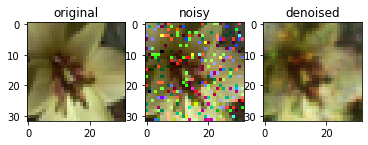

In [148]:
# There were total 10000 images for single noise for test. As we concatinated the all the noises so it beacme 40000
# 0 to 10000 for gaussian images
# 10000 to 20000 for poisson images
# 20000 to 30000 for salt and pepper images
# 30000 to 40000 for speckle images
# put value from these ranges to idx for testing
dae_generalized.load_weights('denoising_generalized_all_noise_model.h5')
test_data_denoised = dae_generalized.predict(test_data_noisy)
idx = 20005
plt.subplot(1,3,1)
plt.imshow(test_data_clean[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised[idx])
plt.title('denoised')
plt.show()

# GAU-DAE = Gaussian Denoising Autoencoder 

In [9]:
# Loading the dataset
(train_data_clean_gaussian, _), (test_data_clean_gaussian, _) = cifar100.load_data(label_mode='fine')
train_data_clean_gaussian = train_data_clean_gaussian.astype('float32') / 255.
test_data_clean_gaussian = test_data_clean_gaussian.astype('float32') / 255.


#Adding Gaussian Noise to images
def add_gaussian_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy_gaussian = add_gaussian_noise_and_clip_data(train_data_clean_gaussian)
test_data_noisy_gaussian = add_gaussian_noise_and_clip_data(test_data_clean_gaussian)

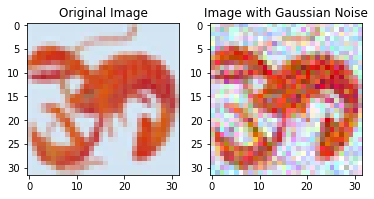

In [10]:
idx = 41
plt.subplot(1,2,1)
plt.imshow(train_data_clean_gaussian[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_gaussian[idx])
plt.title('Image with Gaussian Noise')
plt.show()

In [11]:
def conv_block_gaussian(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block_gaussian(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [12]:
def denoising_autoencoder_gaussian():
   dae_inputs = Input(shape=(32, 32, 3), name='dae_input')
   conv_block_gaussian1 = conv_block_gaussian(dae_inputs, 32, 3)
   conv_block_gaussian2 = conv_block_gaussian(conv_block_gaussian1, 64, 3)
   conv_block_gaussian3 = conv_block_gaussian(conv_block_gaussian2, 128, 3)
   conv_block_gaussian4 = conv_block_gaussian(conv_block_gaussian3, 256, 3)
   conv_block_gaussian5 = conv_block_gaussian(conv_block_gaussian4, 256, 3, 1)

   deconv_block_gaussian1 = deconv_block_gaussian(conv_block_gaussian5, 256, 3)
   merge1 = Concatenate()([deconv_block_gaussian1, conv_block_gaussian3])
   deconv_block_gaussian2 = deconv_block_gaussian(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block_gaussian2, conv_block_gaussian2])
   deconv_block_gaussian3 = deconv_block_gaussian(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block_gaussian3, conv_block_gaussian1])
   deconv_block_gaussian4 = deconv_block_gaussian(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block_gaussian4)

   dae_outputs = Activation('sigmoid', name='dae_output')(final_deconv)
  
   return Model(dae_inputs, dae_outputs, name='dae')

In [ ]:
dae_gaussian = denoising_autoencoder_gaussian()
dae_gaussian.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_gaussian_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_gaussian.fit(train_data_noisy_gaussian,
       train_data_clean_gaussian,
       validation_data=(test_data_noisy_gaussian, test_data_clean_gaussian),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

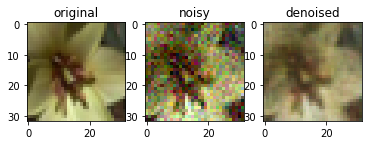

In [14]:
dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
test_data_denoised_gaussian = dae_gaussian.predict(test_data_noisy_gaussian)
idx = 5
plt.subplot(1,3,1)
plt.imshow(test_data_clean_gaussian[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_gaussian[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_gaussian[idx])
plt.title('denoised')
plt.show()

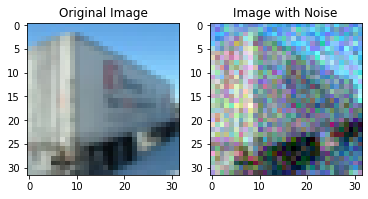

In [15]:
# Loading the dataset CIFAR-10 for testing DAEs
(train_data_clean_gaussian_cifar10, _), (test_data_clean_gaussian_cifar10, _) = cifar10.load_data()
train_data_clean_gaussian_cifar10 = train_data_clean_gaussian_cifar10.astype('float32') / 255.
test_data_clean_gaussian_cifar10 = test_data_clean_gaussian_cifar10.astype('float32') / 255.


#Adding Noise to CIFAR-10 images
def add_gaussian_cifar10_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy_gaussian_cifar10 = add_gaussian_cifar10_noise_and_clip_data(train_data_clean_gaussian_cifar10)
test_data_noisy_gaussian_cifar10 = add_gaussian_cifar10_noise_and_clip_data(test_data_clean_gaussian_cifar10)
idx = 15
plt.subplot(1,2,1)
plt.imshow(train_data_clean_gaussian_cifar10[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_gaussian_cifar10[idx])
plt.title('Image with Noise')
plt.show()

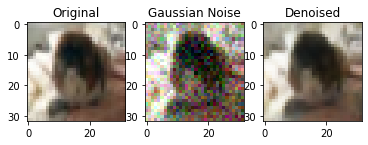

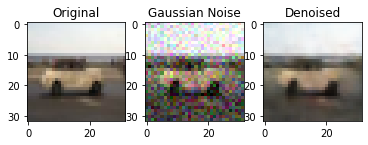

In [23]:
dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
test_data_denoised_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)

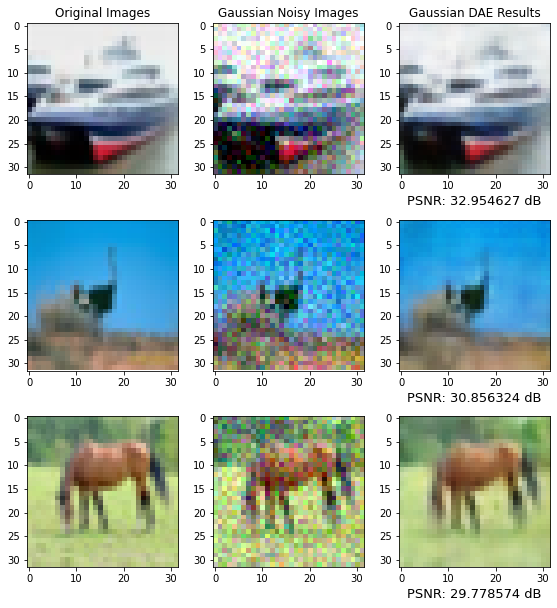

In [83]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0.3)
idx = 1
plt.subplot(3,3,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('Original Images')
plt.subplot(3,3,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('Gaussian Noisy Images')
plt.subplot(3,3,3)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.title('Gaussian DAE Results')
plt.xlabel('PSNR: 32.954627 dB',fontsize=13)
idx = 655
plt.subplot(3,3,4)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.subplot(3,3,5)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.subplot(3,3,6)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.xlabel('PSNR: 30.856324 dB',fontsize=13)
idx = 60
plt.subplot(3,3,7)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.subplot(3,3,8)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.subplot(3,3,9)
plt.xlabel('PSNR: 29.778574 dB',fontsize=13)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.savefig('figures/Gaussian DAE Results.png', dpi=400) # always save image before showing it.
plt.show()

In [ ]:
dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
test_data_denoised_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.title('denoised')
plt.show()

# PO-DAE = Poisson Denoising Autoencoder 

In [120]:
# Loading the dataset
(train_data_clean_poisson, _), (test_data_clean_poisson, _) = cifar100.load_data(label_mode='fine')
train_data_clean_poisson = train_data_clean_poisson.astype('float32') / 255.
test_data_clean_poisson = test_data_clean_poisson.astype('float32') / 255.

#Adding poission noise in data
noise_factor = 0.10

from skimage.util import random_noise

#Poisson Noise added to image dataset
train_data_noisy_poisson = random_noise(train_data_clean_poisson, mode="poisson", seed=42, clip=False)
test_data_noisy_poisson = random_noise(test_data_clean_poisson, mode="poisson", seed=42, clip=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


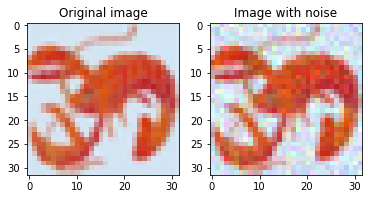

In [121]:
idx = 41
plt.subplot(1,2,1)
plt.imshow(train_data_clean_poisson[idx])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_poisson[idx])
plt.title('Image with noise')
plt.show()

In [122]:
def conv_block_poisson(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block_poisson(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [123]:
def denoising_autoencoder_poisson():
   dae_poisson_inputs = Input(shape=(32, 32, 3), name='dae_poisson_input')
   conv_block_poisson1 = conv_block_poisson(dae_poisson_inputs, 32, 3)
   conv_block_poisson2 = conv_block_poisson(conv_block_poisson1, 64, 3)
   conv_block_poisson3 = conv_block_poisson(conv_block_poisson2, 128, 3)
   conv_block_poisson4 = conv_block_poisson(conv_block_poisson3, 256, 3)
   conv_block_poisson5 = conv_block_poisson(conv_block_poisson4, 256, 3, 1)

   deconv_block_poisson1 = deconv_block_poisson(conv_block_poisson5, 256, 3)
   merge1 = Concatenate()([deconv_block_poisson1, conv_block_poisson3])
   deconv_block_poisson2 = deconv_block_poisson(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block_poisson2, conv_block_poisson2])
   deconv_block_poisson3 = deconv_block_poisson(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block_poisson3, conv_block_poisson1])
   deconv_block_poisson4 = deconv_block_poisson(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block_poisson4)

   dae_poisson_outputs = Activation('sigmoid', name='dae_poisson_output')(final_deconv)
  
   return Model(dae_poisson_inputs, dae_poisson_outputs, name='dae_poisson')

In [ ]:
dae_poisson = denoising_autoencoder_poisson()
dae_poisson.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_poisson_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_poisson.fit(train_data_noisy_poisson,
       train_data_clean_poisson,
       validation_data=(test_data_noisy_poisson, test_data_clean_poisson),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


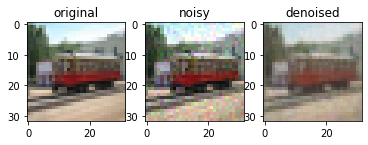

In [125]:
dae_poisson.load_weights('denoising_poisson_noise_model.h5')
test_data_denoised_poisson = dae_poisson.predict(test_data_noisy_poisson)
idx = 12
plt.subplot(1,3,1)
plt.imshow(test_data_clean_poisson[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_poisson[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_poisson[idx])
plt.title('denoised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


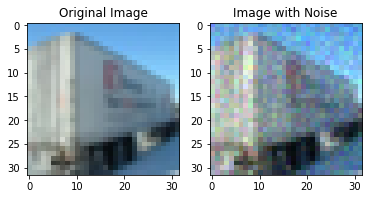

In [126]:
# Loading the dataset CIFAR-10 for testing DAEs
(train_data_clean_poisson_cifar10, _), (test_data_clean_poisson_cifar10, _) = cifar10.load_data()
train_data_clean_poisson_cifar10 = train_data_clean_poisson_cifar10.astype('float32') / 255.
test_data_clean_poisson_cifar10 = test_data_clean_poisson_cifar10.astype('float32') / 255.


#Adding Noise to CIFAR-10 images
#Adding poisson noise in data
noise_factor = 0.10

from skimage.util import random_noise

#Poisson Noise added to image dataset
train_data_noisy_poisson_cifar10 = random_noise(train_data_clean_poisson_cifar10, mode="poisson", seed=42, clip=False)
test_data_noisy_poisson_cifar10 = random_noise(test_data_clean_poisson_cifar10, mode="poisson", seed=42, clip=False)


idx = 15
plt.subplot(1,2,1)
plt.imshow(train_data_clean_poisson_cifar10[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_poisson_cifar10[idx])
plt.title('Image with Noise')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


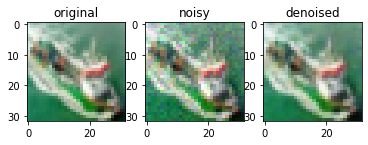

In [129]:
dae_poisson.load_weights('denoising_poisson_noise_model.h5')
test_data_denoised_poisson_cifar10 = dae_poisson.predict(test_data_noisy_poisson_cifar10)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.title('denoised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


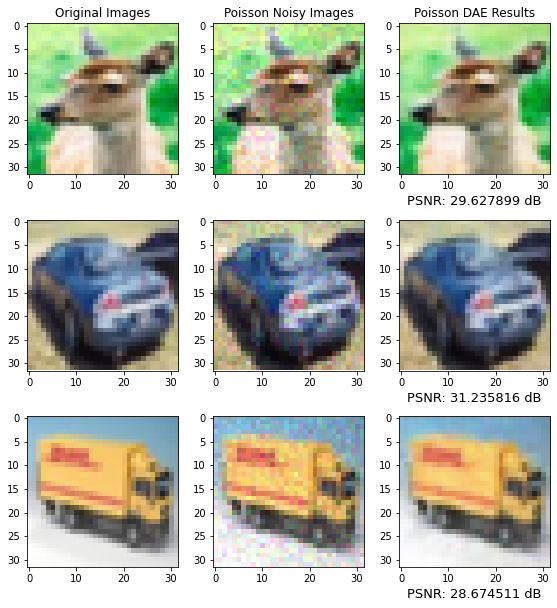

In [137]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0.3)
idx = 455
plt.subplot(3,3,1)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('Original Images')
plt.subplot(3,3,2)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('Poisson Noisy Images')
plt.subplot(3,3,3)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.title('Poisson DAE Results')
plt.xlabel('PSNR: 29.627899 dB',fontsize=13)
idx = 7555
plt.subplot(3,3,4)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.subplot(3,3,5)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.subplot(3,3,6)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.xlabel('PSNR: 31.235816 dB',fontsize=13)
idx = 9566
plt.subplot(3,3,7)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.subplot(3,3,8)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.subplot(3,3,9)
plt.xlabel('PSNR: 28.674511 dB',fontsize=13)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.savefig('figures/Poisson DAE Results.png', dpi=400) # always save image before showing it.
plt.show()

# S&P-DAE = Salt & Pepper Denoising Autoencoder 

In [84]:
# Loading the dataset
(train_data_clean_salt_pepper, _), (test_data_clean_salt_pepper, _) = cifar100.load_data(label_mode='fine')
train_data_clean_salt_pepper = train_data_clean_salt_pepper.astype('float32') / 255.
test_data_clean_salt_pepper = test_data_clean_salt_pepper.astype('float32') / 255.

#adding noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="poisson")
#just change the mode pf the noise to-->'gaussain',
#Salt and Pepper Noise added to image dataset
train_data_noisy_salt_pepper = random_noise(train_data_clean_salt_pepper, mode="s&p",clip=True, amount=noise_factor)
test_data_noisy_salt_pepper = random_noise(test_data_clean_salt_pepper, mode="s&p",clip=True, amount=noise_factor)


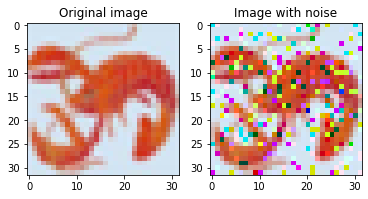

In [85]:
idx = 41
plt.subplot(1,2,1)
plt.imshow(train_data_clean_salt_pepper[idx])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_salt_pepper[idx])
plt.title('Image with noise')
plt.show()

In [86]:
def conv_block_salt_pepper(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block_salt_pepper(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [87]:
def denoising_autoencoder_salt_pepper():
   dae_salt_pepper_inputs = Input(shape=(32, 32, 3), name='dae_salt_pepper_input')
   conv_block_salt_pepper1 = conv_block_salt_pepper(dae_salt_pepper_inputs, 32, 3)
   conv_block_salt_pepper2 = conv_block_salt_pepper(conv_block_salt_pepper1, 64, 3)
   conv_block_salt_pepper3 = conv_block_salt_pepper(conv_block_salt_pepper2, 128, 3)
   conv_block_salt_pepper4 = conv_block_salt_pepper(conv_block_salt_pepper3, 256, 3)
   conv_block_salt_pepper5 = conv_block_salt_pepper(conv_block_salt_pepper4, 256, 3, 1)

   deconv_block_salt_pepper1 = deconv_block_salt_pepper(conv_block_salt_pepper5, 256, 3)
   merge1 = Concatenate()([deconv_block_salt_pepper1, conv_block_salt_pepper3])
   deconv_block_salt_pepper2 = deconv_block_salt_pepper(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block_salt_pepper2, conv_block_salt_pepper2])
   deconv_block_salt_pepper3 = deconv_block_salt_pepper(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block_salt_pepper3, conv_block_salt_pepper1])
   deconv_block_salt_pepper4 = deconv_block_salt_pepper(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block_salt_pepper4)

   dae_salt_pepper_outputs = Activation('sigmoid', name='dae_salt_pepper_output')(final_deconv)
  
   return Model(dae_salt_pepper_inputs, dae_salt_pepper_outputs, name='dae_salt_pepper')

In [ ]:
dae_salt_pepper = denoising_autoencoder_salt_pepper()
dae_salt_pepper.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_salt_pepper_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_salt_pepper.fit(train_data_noisy_salt_pepper,
       train_data_clean_salt_pepper,
       validation_data=(test_data_noisy_salt_pepper, test_data_clean_salt_pepper),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

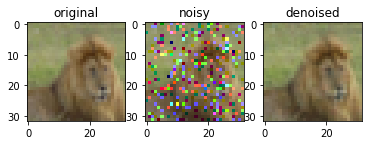

In [94]:
dae_salt_pepper.load_weights('denoising_salt_pepper_noise_model.h5')
test_data_denoised_salt_pepper = dae_salt_pepper.predict(test_data_noisy_salt_pepper)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_salt_pepper[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_salt_pepper[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_salt_pepper[idx])
plt.title('denoised')
plt.show()

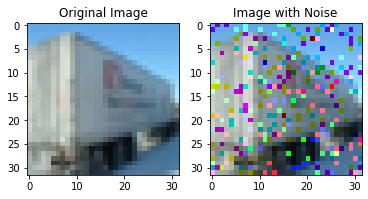

In [95]:
# Loading the dataset CIFAR-10 for testing DAEs
(train_data_clean_salt_pepper_cifar10, _), (test_data_clean_salt_pepper_cifar10, _) = cifar10.load_data()
train_data_clean_salt_pepper_cifar10 = train_data_clean_salt_pepper_cifar10.astype('float32') / 255.
test_data_clean_salt_pepper_cifar10 = test_data_clean_salt_pepper_cifar10.astype('float32') / 255.


#Adding Noise to CIFAR-10 images
#Adding salt_pepper noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="salt_pepper")
#Salt and Pepper Noise added to image dataset
train_data_noisy_salt_pepper_cifar10  = random_noise(train_data_clean_salt_pepper_cifar10 , mode="s&p",clip=True, amount=noise_factor)
test_data_noisy_salt_pepper_cifar10  = random_noise(test_data_clean_salt_pepper_cifar10 , mode="s&p",clip=True, amount=noise_factor)

idx = 15
plt.subplot(1,2,1)
plt.imshow(train_data_clean_salt_pepper_cifar10[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_salt_pepper_cifar10[idx])
plt.title('Image with Noise')
plt.show()

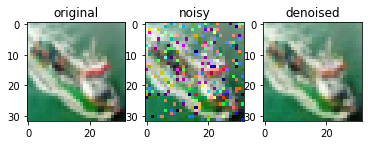

In [96]:
dae_salt_pepper.load_weights('denoising_salt_pepper_noise_model.h5')
test_data_denoised_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_salt_pepper_cifar10)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.title('denoised')
plt.show()

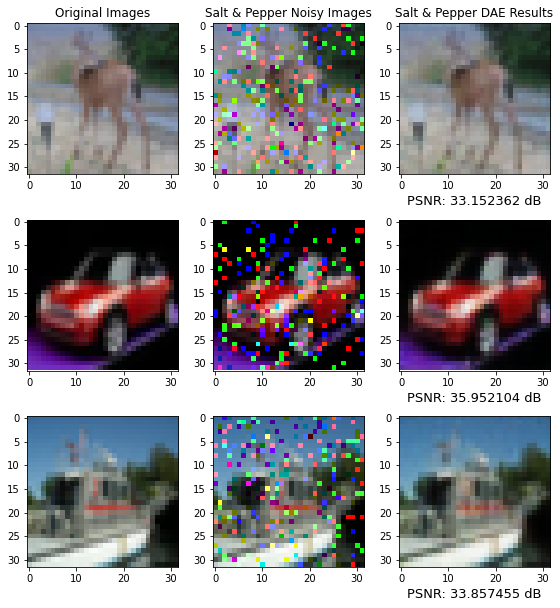

In [101]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0.3)
idx = 100
plt.subplot(3,3,1)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('Original Images')
plt.subplot(3,3,2)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper Noisy Images')
plt.subplot(3,3,3)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper DAE Results')
plt.xlabel('PSNR: 33.152362 dB',fontsize=13)
idx = 6555
plt.subplot(3,3,4)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.subplot(3,3,5)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.subplot(3,3,6)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.xlabel('PSNR: 35.952104 dB',fontsize=13)
idx = 600
plt.subplot(3,3,7)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.subplot(3,3,8)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.subplot(3,3,9)
plt.xlabel('PSNR: 33.857455 dB',fontsize=13)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.savefig('figures/Salt & Pepper DAE Results.png', dpi=400) # always save image before showing it.
plt.show()

# SPK-DAE = Speckle Denoising Autoencoder 

In [102]:
# Loading the dataset
(train_data_clean_speckle, _), (test_data_clean_speckle, _) = cifar100.load_data(label_mode='fine')
train_data_clean_speckle = train_data_clean_speckle.astype('float32') / 255.
test_data_clean_speckle = test_data_clean_speckle.astype('float32') / 255.

#adding noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="poisson")
#just change the mode pf the noise to-->'gaussain',
#Speckle Noise added to image dataset
train_data_noisy_speckle = random_noise(train_data_clean_speckle, mode="speckle", seed=42, clip=False)
test_data_noisy_speckle = random_noise(test_data_clean_speckle, mode="speckle", seed=42, clip=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


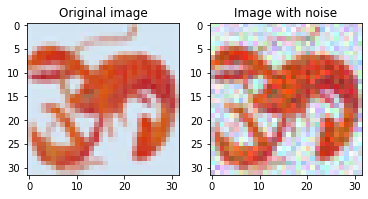

In [103]:
idx = 41
plt.subplot(1,2,1)
plt.imshow(train_data_clean_speckle[idx])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_speckle[idx])
plt.title('Image with noise')
plt.show()

In [104]:
def conv_block_speckle(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block_speckle(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [105]:
def denoising_autoencoder_speckle():
   dae_speckle_inputs = Input(shape=(32, 32, 3), name='dae_speckle_input')
   conv_block_speckle1 = conv_block_speckle(dae_speckle_inputs, 32, 3)
   conv_block_speckle2 = conv_block_speckle(conv_block_speckle1, 64, 3)
   conv_block_speckle3 = conv_block_speckle(conv_block_speckle2, 128, 3)
   conv_block_speckle4 = conv_block_speckle(conv_block_speckle3, 256, 3)
   conv_block_speckle5 = conv_block_speckle(conv_block_speckle4, 256, 3, 1)

   deconv_block_speckle1 = deconv_block_speckle(conv_block_speckle5, 256, 3)
   merge1 = Concatenate()([deconv_block_speckle1, conv_block_speckle3])
   deconv_block_speckle2 = deconv_block_speckle(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block_speckle2, conv_block_speckle2])
   deconv_block_speckle3 = deconv_block_speckle(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block_speckle3, conv_block_speckle1])
   deconv_block_speckle4 = deconv_block_speckle(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block_speckle4)

   dae_speckle_outputs = Activation('sigmoid', name='dae_speckle_output')(final_deconv)
  
   return Model(dae_speckle_inputs, dae_speckle_outputs, name='dae_speckle')

In [ ]:
dae_speckle = denoising_autoencoder_speckle()
dae_speckle.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_speckle_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_speckle.fit(train_data_noisy_speckle,
       train_data_clean_speckle,
       validation_data=(test_data_noisy_speckle, test_data_clean_speckle),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


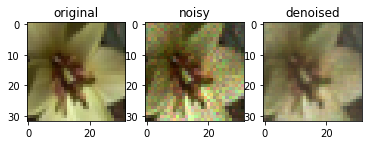

In [107]:
dae_speckle.load_weights('denoising_speckle_noise_model.h5')
test_data_denoised_speckle = dae_speckle.predict(test_data_noisy_speckle)
idx = 5
plt.subplot(1,3,1)
plt.imshow(test_data_clean_speckle[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_speckle[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_speckle[idx])
plt.title('denoised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


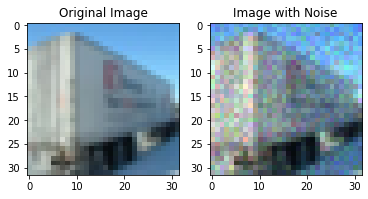

In [108]:
# Loading the dataset CIFAR-10 for testing DAEs
(train_data_clean_speckle_cifar10, _), (test_data_clean_speckle_cifar10, _) = cifar10.load_data()
train_data_clean_speckle_cifar10 = train_data_clean_speckle_cifar10.astype('float32') / 255.
test_data_clean_speckle_cifar10 = test_data_clean_speckle_cifar10.astype('float32') / 255.


#Adding Noise to CIFAR-10 images
#Adding speckle noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="speckle")
train_data_noisy_speckle_cifar10  = random_noise(train_data_clean_speckle_cifar10 , mode="speckle", seed=42, clip=False)
test_data_noisy_speckle_cifar10  = random_noise(test_data_clean_speckle_cifar10 , mode="speckle", seed=42, clip=False)

idx = 15
plt.subplot(1,2,1)
plt.imshow(train_data_clean_speckle_cifar10[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_speckle_cifar10[idx])
plt.title('Image with Noise')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


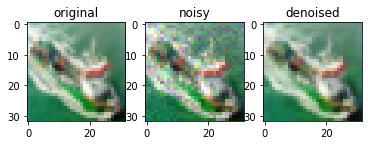

In [110]:
dae_speckle.load_weights('denoising_speckle_noise_model.h5')
test_data_denoised_speckle_cifar10 = dae_speckle.predict(test_data_noisy_speckle_cifar10)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.title('denoised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


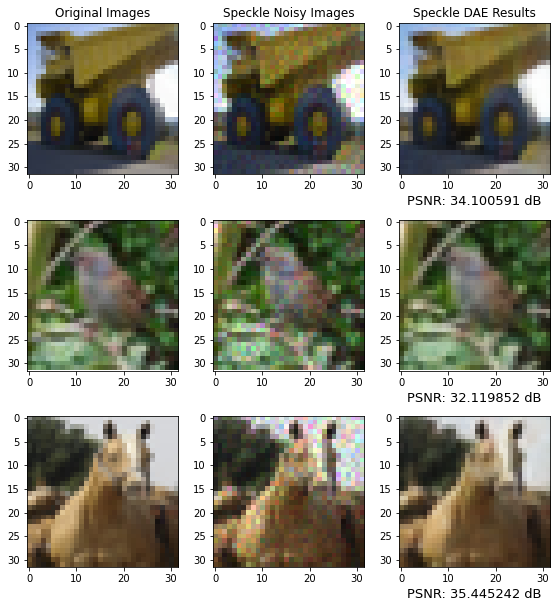

In [119]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0.3)
idx = 9777
plt.subplot(3,3,1)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('Original Images')
plt.subplot(3,3,2)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('Speckle Noisy Images')
plt.subplot(3,3,3)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.title('Speckle DAE Results')
plt.xlabel('PSNR: 34.100591 dB',fontsize=13)
idx = 65
plt.subplot(3,3,4)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.subplot(3,3,5)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.subplot(3,3,6)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.xlabel('PSNR: 32.119852 dB',fontsize=13)
idx = 7899
plt.subplot(3,3,7)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.subplot(3,3,8)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.subplot(3,3,9)
plt.xlabel('PSNR: 35.445242 dB',fontsize=13)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.savefig('figures/Speckle DAE Results.png', dpi=400) # always save image before showing it.
plt.show()

# Testing Network # 2  - Denoising Autoencoder models (4 DAEs)

# Custom Images Testing

In [ ]:
from PIL import Image
from numpy import asarray

# loading the original image to compare
img_name='0002.png' # add original image name here
img_original = Image.open('denoising_manual_test_images/'+img_name) 
numpydata_img_original = asarray(img_original)

#Gaussian Denoising Autoencoder
# loading the image and convert into numpy array
img = Image.open('denoising_manual_test_images/gau_noise'+img_name)
numpydata = asarray(img)
numpydata = numpydata.astype('float32') / 255.
train_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = test_data_noisy_custom_img.reshape((-1, 32, 32, 3))
dae_speckle.load_weights('denoising_gaussian_noise_model.h5')
cifar10_test_denoised = dae_gaussian.predict(test_data_noisy_custom_img)
idx = 0
plt.subplot(1,3,1)
plt.imshow(numpydata_img_original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_custom_img[idx])
plt.title('Gassian')
plt.subplot(1,3,3)
plt.imshow(cifar10_test_denoised[idx])
plt.title('GAU-DAE')
plt.show()

#Poisson Denoising Autoencoder
# loading the image and convert into numpy array
img = Image.open('denoising_manual_test_images/po_noise'+img_name)
numpydata = asarray(img)
numpydata = numpydata.astype('float32') / 255.
train_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = test_data_noisy_custom_img.reshape((-1, 32, 32, 3))
dae_speckle.load_weights('denoising_poisson_noise_model.h5')
cifar10_test_denoised = dae_poisson.predict(test_data_noisy_custom_img)
idx = 0
plt.subplot(1,3,1)
plt.imshow(numpydata_img_original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_custom_img[idx])
plt.title('Poisson')
plt.subplot(1,3,3)
plt.imshow(cifar10_test_denoised[idx])
plt.title('PO-DAE')
plt.show()

#Salt & Pepper Denoising Autoencoder
# loading the image and convert into numpy array
img = Image.open('denoising_manual_test_images/sp_noise'+img_name)
numpydata = asarray(img)
numpydata = numpydata.astype('float32') / 255.
train_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = test_data_noisy_custom_img.reshape((-1, 32, 32, 3))
dae_speckle.load_weights('denoising_salt_pepper_noise_model.h5')
cifar10_test_denoised = dae_salt_pepper.predict(test_data_noisy_custom_img)
idx = 0
plt.subplot(1,3,1)
plt.imshow(numpydata_img_original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_custom_img[idx])
plt.title('Salt & Pepper')
plt.subplot(1,3,3)
plt.imshow(cifar10_test_denoised[idx])
plt.title('S&P-DAE')
plt.show()

#Speckle Denoising Autoencoder
# loading the image and convert into numpy array
img = Image.open('denoising_manual_test_images/spk_noise'+img_name)
numpydata = asarray(img)
numpydata = numpydata.astype('float32') / 255.
train_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = test_data_noisy_custom_img.reshape((-1, 32, 32, 3))
dae_speckle.load_weights('denoising_speckle_noise_model.h5')
cifar10_test_denoised = dae_speckle.predict(test_data_noisy_custom_img)
idx = 0
plt.subplot(1,3,1)
plt.imshow(numpydata_img_original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_custom_img[idx])
plt.title('Speckle')
plt.subplot(1,3,3)
plt.imshow(cifar10_test_denoised[idx])
plt.title('SPK-DAE')
plt.show()

# DAE Testing on CIFAR-10 Image dataset

In [ ]:
# Testing All DAEs on same image for differnet noises

idx = 14 #set the image id here

dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
test_data_denoised_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)
plt.subplot(1,3,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('Gaussian')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.show()

dae_poisson.load_weights('denoising_poisson_noise_model.h5')
test_data_denoised_poisson_cifar10 = dae_poisson.predict(test_data_noisy_poisson_cifar10)
plt.subplot(1,3,1)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('Poisson')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.show()

dae_salt_pepper.load_weights('denoising_salt_pepper_noise_model.h5')
test_data_denoised_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_salt_pepper_cifar10)
plt.subplot(1,3,1)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.show()

dae_speckle.load_weights('denoising_speckle_noise_model.h5')
test_data_denoised_speckle_cifar10 = dae_speckle.predict(test_data_noisy_speckle_cifar10)
plt.subplot(1,3,1)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('Speckle')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.show()

# Testing 4 DAEs on a each noise type

In [ ]:
dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
dae_poisson.load_weights('denoising_poisson_noise_model.h5')
dae_salt_pepper.load_weights('denoising_salt_pepper_noise_model.h5')
dae_speckle.load_weights('denoising_speckle_noise_model.h5')
dae_generalized.load_weights('denoising_generalized_all_noise_model.h5')

In [ ]:
idx = 1244 #set the image id here

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_gaussian_cifar10)
print('All DAEs on Gaussian Noise')
plt.subplot(2,4,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('Gaussian')
plt.subplot(2,4,3)
plt.imshow(test_data_DAE_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.subplot(2,4,4)
plt.imshow(test_data_DAE_generalized_cifar10[idx])
plt.title('GER-DAE')
plt.subplot(2,4,5)
plt.imshow(test_data_DAE_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.subplot(2,4,6)
plt.imshow(test_data_DAE_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.subplot(2,4,7)
plt.imshow(test_data_DAE_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.tight_layout()
plt.show()

All DAEs on Poisson Noise


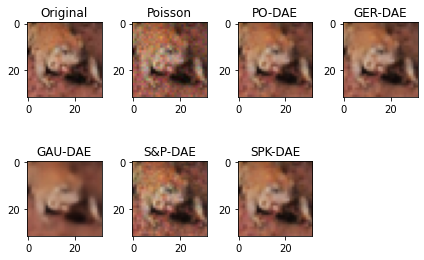

In [137]:
idx = 5 #set the image id here

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_poisson_cifar10)
print('All DAEs on Poisson Noise')
plt.subplot(2,4,1)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('Poisson')
plt.subplot(2,4,3)
plt.imshow(test_data_DAE_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.subplot(2,4,4)
plt.imshow(test_data_DAE_generalized_cifar10[idx])
plt.title('GER-DAE')
plt.subplot(2,4,5)
plt.imshow(test_data_DAE_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.subplot(2,4,6)
plt.imshow(test_data_DAE_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.subplot(2,4,7)
plt.imshow(test_data_DAE_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.tight_layout()
plt.show()

All DAEs on Salt & Pepper Noise


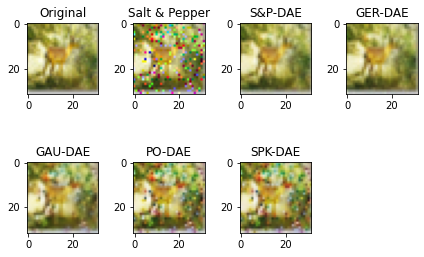

In [138]:
idx = 500 #set the image id here

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_salt_pepper_cifar10)
print('All DAEs on Salt & Pepper Noise')
plt.subplot(2,4,1)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper')
plt.subplot(2,4,3)
plt.imshow(test_data_DAE_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.subplot(2,4,4)
plt.imshow(test_data_DAE_generalized_cifar10[idx])
plt.title('GER-DAE')
plt.subplot(2,4,5)
plt.imshow(test_data_DAE_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.subplot(2,4,6)
plt.imshow(test_data_DAE_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.subplot(2,4,7)
plt.imshow(test_data_DAE_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


All DAEs on Speckle Noise


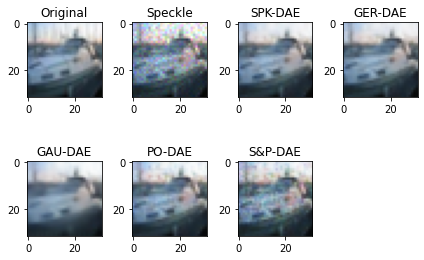

In [152]:
idx = 2 #set the image id here

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_speckle_cifar10)
print('All DAEs on Speckle Noise')
plt.subplot(2,4,1)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('Speckle')
plt.subplot(2,4,3)
plt.imshow(test_data_DAE_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.subplot(2,4,4)
plt.imshow(test_data_DAE_generalized_cifar10[idx])
plt.title('GER-DAE')
plt.subplot(2,4,5)
plt.imshow(test_data_DAE_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.subplot(2,4,6)
plt.imshow(test_data_DAE_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.subplot(2,4,7)
plt.imshow(test_data_DAE_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.tight_layout()
plt.show()

# Testing of PSNR here - Rough

In [209]:
#Orignal Image saving as png
idx = 1
img_arr=test_data_clean_speckle_cifar10[idx]*255
img_arr=img_arr.astype(np.uint8)
from PIL import Image
import numpy as np
img = Image.fromarray(img_arr)
#img.show() # Image will be shown in a seperate window - close it when running code again.
img.save("denoised_images_test_psnr/original_image.png")

#Denoised Specific DAE Image saving as png
img_arr=test_data_DAE_speckle_cifar10[idx]*255
img_arr=img_arr.astype(np.uint8)
from PIL import Image
import numpy as np
img = Image.fromarray(img_arr)
#img.show() # Image will be shown in a seperate window - close it when running code again.
img.save("denoised_images_test_psnr/specfic_dae_denoised_image.png")

#Denoised Generalized DAE Image saving as png
img_arr=test_data_DAE_generalized_cifar10[idx]*255
img_arr=img_arr.astype(np.uint8)
from PIL import Image
import numpy as np
img = Image.fromarray(img_arr)
#img.show() # Image will be shown in a seperate window - close it when running code again.
img.save("denoised_images_test_psnr/generalized_dae_denoised_image.png")

In [ ]:
# Calculating PSNR of the Image - An improved function
from math import log10, sqrt
import cv2
import numpy as np

def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    print(f"PSNR value is {psnr} dB")
    
# Invoke the function by passing the names of original and denoised images as parameters
print("PSNR of Specfic DAE")
PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image.png","denoised_images_test_psnr/specfic_dae_denoised_image.png")
print("PSNR of Generalized DAE")
PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image.png","denoised_images_test_psnr/generalized_dae_denoised_image.png") 

# Calculating the MEAN difference between Specfic DAE and Generalized DAE

In [ ]:
#Gaussain DAE and Generalized DAE MEAN difference Calculating

from math import log10, sqrt
import cv2
import numpy as np

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_gaussian_cifar10)


def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    #print(f"PSNR value is {psnr} dB")
    return psnr


psnr_sum_specific_dae=0
psnr_mean_specific_dae=0

psnr_sum_generalized_dae=0
psnr_mean_generalized_dae=0

#Set the no of images to calculate the mean
total_imgs=10000
for i in range(total_imgs):
    idx = i 
    img_arr=test_data_clean_gaussian_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/original_image"+str(idx)+".png")

    #Denoised Specific DAE Image saving as png
    img_arr=test_data_DAE_gaussian_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")

    #Denoised Generalized DAE Image saving as png
    img_arr=test_data_DAE_generalized_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")
    
    #For View into individual PSNR of the image
    print("PSNR of Specfic DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png"))
    print("PSNR of Generalized DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")) 
    print("--------------------------------------------------------------")
    
    # Invoke the function by passing the names of original and denoised images as parameters
    psnr_sum_specific_dae=psnr_sum_specific_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")
    psnr_sum_generalized_dae=psnr_sum_generalized_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png") 

    
print("==================================================================")
print("Mean PSNR of Specfic DAE for "+str(total_imgs)+" images")
psnr_mean_specific_dae=psnr_sum_specific_dae/total_imgs
print(psnr_mean_specific_dae)
                                                                        
print("Mean PSNR of Generalized DAE for "+str(total_imgs)+" images")
psnr_mean_generalized_dae=psnr_sum_generalized_dae/total_imgs
print(psnr_mean_generalized_dae)  

print("Gaussian - Mean difference between Specfic DAE and Generalized DAE for "+str(total_imgs)+" images")
mean_difference=psnr_mean_specific_dae-psnr_mean_generalized_dae
print(mean_difference)

In [ ]:
#Salt_Pepper DAE and Generalized DAE MEAN difference Calculating


from math import log10, sqrt
import cv2
import numpy as np


test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_salt_pepper_cifar10)


def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    #print(f"PSNR value is {psnr} dB")
    return psnr


psnr_sum_specific_dae=0
psnr_mean_specific_dae=0

psnr_sum_generalized_dae=0
psnr_mean_generalized_dae=0

#Set the no of images to calculate the mean
total_imgs=1000
for i in range(total_imgs):
    idx = i 
    img_arr=test_data_clean_salt_pepper_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/original_image"+str(idx)+".png")

    #Denoised Specific DAE Image saving as png
    img_arr=test_data_DAE_salt_pepper_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")

    #Denoised Generalized DAE Image saving as png
    img_arr=test_data_DAE_generalized_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")
    
    #For View into individual PSNR of the image
    print("PSNR of Specfic DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png"))
    print("PSNR of Generalized DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")) 
    print("--------------------------------------------------------------")
    
    # Invoke the function by passing the names of original and denoised images as parameters
    psnr_sum_specific_dae=psnr_sum_specific_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")
    psnr_sum_generalized_dae=psnr_sum_generalized_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png") 

    
print("==================================================================")
print("Mean PSNR of Specfic DAE for "+str(total_imgs)+" images")
psnr_mean_specific_dae=psnr_sum_specific_dae/total_imgs
print(psnr_mean_specific_dae)
                                                                        
print("Mean PSNR of Generalized DAE for "+str(total_imgs)+" images")
psnr_mean_generalized_dae=psnr_sum_generalized_dae/total_imgs
print(psnr_mean_generalized_dae)  

print("Salt_Pepper - Mean difference between Specfic DAE and Generalized DAE for "+str(total_imgs)+" images")
mean_difference=psnr_mean_specific_dae-psnr_mean_generalized_dae
print(mean_difference)

In [ ]:
#Poisson DAE and Generalized DAE MEAN difference Calculating


from math import log10, sqrt
import cv2
import numpy as np


test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_poisson_cifar10)


def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    #print(f"PSNR value is {psnr} dB")
    return psnr


psnr_sum_specific_dae=0
psnr_mean_specific_dae=0

psnr_sum_generalized_dae=0
psnr_mean_generalized_dae=0

#Set the no of images to calculate the mean
total_imgs=100
for i in range(total_imgs):
    idx = i 
    img_arr=test_data_clean_poisson_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/original_image"+str(idx)+".png")

    #Denoised Specific DAE Image saving as png
    img_arr=test_data_DAE_poisson_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")

    #Denoised Generalized DAE Image saving as png
    img_arr=test_data_DAE_generalized_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")
    
    #For View into individual PSNR of the image
    print("PSNR of Specfic DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png"))
    print("PSNR of Generalized DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")) 
    print("--------------------------------------------------------------")
    
    # Invoke the function by passing the names of original and denoised images as parameters
    psnr_sum_specific_dae=psnr_sum_specific_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")
    psnr_sum_generalized_dae=psnr_sum_generalized_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png") 

    
print("==================================================================")
print("Mean PSNR of Specfic DAE for "+str(total_imgs)+" images")
psnr_mean_specific_dae=psnr_sum_specific_dae/total_imgs
print(psnr_mean_specific_dae)
                                                                        
print("Mean PSNR of Generalized DAE for "+str(total_imgs)+" images")
psnr_mean_generalized_dae=psnr_sum_generalized_dae/total_imgs
print(psnr_mean_generalized_dae)  

print("Poisson - Mean difference between Specfic DAE and Generalized DAE for "+str(total_imgs)+" images")
mean_difference=psnr_mean_specific_dae-psnr_mean_generalized_dae
print(mean_difference)

In [ ]:
#Speckle DAE and Generalized DAE MEAN difference Calculating


from math import log10, sqrt
import cv2
import numpy as np

test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_speckle_cifar10)


def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    #print(f"PSNR value is {psnr} dB")
    return psnr


psnr_sum_specific_dae=0
psnr_mean_specific_dae=0

psnr_sum_generalized_dae=0
psnr_mean_generalized_dae=0

#Set the no of images to calculate the mean
total_imgs=100
for i in range(total_imgs):
    idx = i 
    img_arr=test_data_clean_speckle_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/original_image"+str(idx)+".png")

    #Denoised Specific DAE Image saving as png
    img_arr=test_data_DAE_speckle_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")

    #Denoised Generalized DAE Image saving as png
    img_arr=test_data_DAE_generalized_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")
    
    #For View into individual PSNR of the image
    print("PSNR of Specfic DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png"))
    print("PSNR of Generalized DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")) 
    print("--------------------------------------------------------------")
    
    # Invoke the function by passing the names of original and denoised images as parameters
    psnr_sum_specific_dae=psnr_sum_specific_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")
    psnr_sum_generalized_dae=psnr_sum_generalized_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png") 

    
print("==================================================================")
print("Mean PSNR of Specfic DAE for "+str(total_imgs)+" images")
psnr_mean_specific_dae=psnr_sum_specific_dae/total_imgs
print(psnr_mean_specific_dae)
                                                                        
print("Mean PSNR of Generalized DAE for "+str(total_imgs)+" images")
psnr_mean_generalized_dae=psnr_sum_generalized_dae/total_imgs
print(psnr_mean_generalized_dae)  

print("Speckle - Mean difference between Specfic DAE and Generalized DAE for "+str(total_imgs)+" images")
mean_difference=psnr_mean_specific_dae-psnr_mean_generalized_dae
print(mean_difference)

In [ ]:
#Code save current running without dropput function.
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(4, activation='softmax')
])
model.summary()

# Generating Specified vs. Genralized DAE results figures

In [200]:
dae_generalized.load_weights('denoising_generalized_all_noise_model.h5')
# Gaussian with generalized DAE
test_data_denoised_gau = dae_generalized.predict(test_data_noisy_gaussian_cifar10)
# Salt & Pepper with generalized DAE
test_data_denoised_sp = dae_generalized.predict(test_data_noisy_salt_pepper_cifar10)
# Speckle with generalized DAE
test_data_denoised_spk = dae_generalized.predict(test_data_noisy_speckle_cifar10)
# Poisson with generalized DAE
test_data_denoised_po = dae_generalized.predict(test_data_noisy_poisson_cifar10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


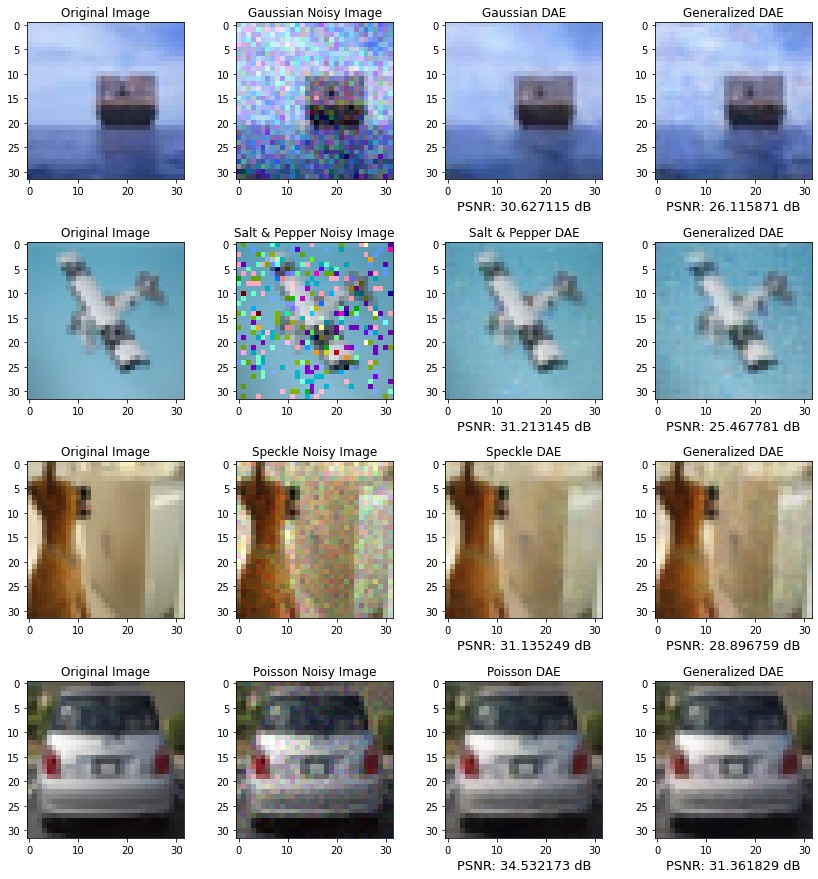

In [231]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0, hspace=0.4)
#idx = 1555 # Best

idx = 6999
plt.subplot(4,4,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('Original Image')
plt.subplot(4,4,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('Gaussian Noisy Image')
plt.subplot(4,4,3)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.title('Gaussian DAE')
plt.xlabel('PSNR: 30.627115 dB',fontsize=13)
plt.subplot(4,4,4)
plt.imshow(test_data_denoised_gau[idx])
plt.title('Generalized DAE')
plt.xlabel('PSNR: 26.115871 dB',fontsize=13)

idx = 1555
plt.subplot(4,4,5)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('Original Image')
plt.subplot(4,4,6)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper Noisy Image')
plt.subplot(4,4,7)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper DAE')
plt.xlabel('PSNR: 31.213145 dB',fontsize=13)
plt.subplot(4,4,8)
plt.imshow(test_data_denoised_sp[idx])
plt.title('Generalized DAE')
plt.xlabel('PSNR: 25.467781 dB',fontsize=13)

idx = 2001
plt.subplot(4,4,9)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('Original Image')
plt.subplot(4,4,10)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('Speckle Noisy Image')
plt.subplot(4,4,11)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.title('Speckle DAE')
plt.xlabel('PSNR: 31.135249 dB',fontsize=13)
plt.subplot(4,4,12)
plt.imshow(test_data_denoised_spk[idx])
plt.title('Generalized DAE')
plt.xlabel('PSNR: 28.896759 dB',fontsize=13)

idx = 9001
plt.subplot(4,4,13)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('Original Image')
plt.subplot(4,4,14)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('Poisson Noisy Image')
plt.subplot(4,4,15)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.title('Poisson DAE')
plt.xlabel('PSNR: 34.532173 dB',fontsize=13)
plt.subplot(4,4,16)
plt.imshow(test_data_denoised_po[idx])
plt.title('Generalized DAE')
plt.xlabel('PSNR: 31.361829 dB',fontsize=13)
plt.savefig('figures/Specified vs Generlaized DAE Results.png', dpi=400) # always save image before showing it.
plt.show()